### Packages Required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import matplotlib.cm as cm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer
import collections

import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

c:\Users\surya\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

### Data Manipulation and Wrangling

In [3]:
price_df = pd.read_csv("stock_price_table.csv")

In [4]:
price_df.head()

,PERMNO,price_20100104,price_20100105,price_20100106,price_20100107,price_20100108,price_20100111,price_20100112,price_20100113,price_20100114,...,price_20151217,price_20151218,price_20151221,price_20151222,price_20151223,price_20151224,price_20151228,price_20151229,price_20151230,price_20151231
0,10026,40.20,38.70,37.03,37.9200,38.0600,37.85,38.33,39.2300,38.9800,...,114.37,112.69,112.92,114.530,115.90,118.21,117.64,119.37,119.25,116.67
1,10032,29.41,30.06,30.18,30.1300,29.7400,29.15,28.80,28.6600,28.7900,...,35.26,34.99,35.22,35.080,35.95,36.05,35.67,35.92,35.46,34.92
2,10044,8.23,8.31,8.35,8.4780,8.4248,8.74,8.92,8.7560,8.7701,...,10.21,10.39,10.36,10.655,10.80,10.74,10.32,10.50,10.38,10.75
3,10065,10.25,10.27,10.31,10.3205,10.3200,10.36,10.24,10.3205,10.3800,...,12.74,12.62,12.62,12.700,12.88,12.89,12.82,12.94,12.94,12.83
4,10104,24.85,24.82,24.46,24.3800,24.6800,24.69,24.56,24.8000,25.3400,...,36.93,36.35,36.42,36.590,36.93,37.01,36.79,37.04,36.92,36.53


In [5]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Columns: 1511 entries, PERMNO to price_20151231
dtypes: float64(1510), int64(1)
memory usage: 40.5 MB


In [6]:
price_df.isnull().sum()

PERMNO            0
price_20100104    0
price_20100105    0
price_20100106    0
price_20100107    0
                 ..
price_20151224    0
price_20151228    0
price_20151229    0
price_20151230    0
price_20151231    0
Length: 1511, dtype: int64

In [7]:
df_ret = price_df.set_index('PERMNO').T.pct_change().T

In [8]:
df_ret.drop(columns=['price_20100104'], inplace=True)

In [9]:
df_ret.head()

,price_20100105,price_20100106,price_20100107,price_20100108,price_20100111,price_20100112,price_20100113,price_20100114,price_20100115,price_20100119,...,price_20151217,price_20151218,price_20151221,price_20151222,price_20151223,price_20151224,price_20151228,price_20151229,price_20151230,price_20151231
PERMNO,,,,,,,,,,,,,,,,,,,,,
10026,-0.037313,-0.043152,0.024035,0.003692,-0.005518,0.012682,0.023480,-0.006373,0.002565,0.013562,...,-0.011410,-0.014689,0.002041,0.014258,0.011962,0.019931,-0.004822,0.014706,-0.001005,-0.021635
10032,0.022101,0.003992,-0.001657,-0.012944,-0.019839,-0.012007,-0.004861,0.004536,-0.020493,0.018794,...,-0.008715,-0.007657,0.006573,-0.003975,0.024800,0.002782,-0.010541,0.007009,-0.012806,-0.015228
10044,0.009721,0.004813,0.015329,-0.006275,0.037413,0.020595,-0.018386,0.001610,-0.030798,0.011059,...,-0.008738,0.017630,-0.002887,0.028475,0.013609,-0.005556,-0.039106,0.017442,-0.011429,0.035645
10065,0.001951,0.003895,0.001018,-0.000048,0.003876,-0.011583,0.007861,0.005765,-0.011561,0.012671,...,-0.009331,-0.009419,0.000000,0.006339,0.014173,0.000776,-0.005431,0.009360,0.000000,-0.008501
10104,-0.001207,-0.014504,-0.003271,0.012305,0.000405,-0.005265,0.009772,0.021774,-0.003946,0.003566,...,-0.050887,-0.015705,0.001926,0.004668,0.009292,0.002166,-0.005944,0.006795,-0.003240,-0.010563


In [10]:
df_ret = df_ret.dropna()
df_ret.shape

(3510, 1509)

In [11]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df_ret)

In [12]:
# # Adding the "channel" dimension
# df_scaled = df_scaled.reshape(df_scaled.shape[0], df_scaled.shape[1], 1)  # (samples, features, 1)

# # Define the encoder and decoder architecture
# input_shape = (df_scaled.shape[1], df_scaled.shape[2])

# # Encoder with Conv1D
# encoder_input = keras.Input(shape=input_shape)
# x = layers.Conv1D(32, 3, activation='relu', padding='same')(encoder_input)
# x = layers.MaxPooling1D(2, padding='same')(x)  # Each pooling halves the feature dimension
# x = layers.Conv1D(16, 3, activation='relu', padding='same')(x)
# x = layers.MaxPooling1D(2, padding='same')(x)

# # Flatten and bottleneck
# x = layers.Flatten()(x)
# latent_space = layers.Dense(55, activation='relu')(x)  # The bottleneck with 55 features

# # Decoder to match the correct shape
# # The target shape should have enough elements to reshape back to (1509, 1)
# # Calculate the necessary units in Dense layer to ensure correct reshaping
# decoder_dense_units = 1509  # The number of features in the input

# # Decoder with appropriate dense layer and reshaping
# x = layers.Dense(decoder_dense_units, activation='relu')(latent_space)  # Restore to 1509 elements
# x = layers.Reshape((1509, 1))(x)  # Reshape back to original input shape

# # Final decoder operations with Conv1D and optional Upsampling
# x = layers.Conv1D(16, 3, activation='relu', padding='same')(x)
# x = layers.Conv1D(32, 3, activation='relu', padding='same')(x)

# # The final output should match the original input shape
# decoder_output = layers.Conv1D(1, 3, padding='same')(x)

# # Create the autoencoder
# autoencoder = keras.Model(encoder_input, decoder_output)

# # Compile the model
# autoencoder.compile(optimizer='adam', loss='mse')

# # Split the dataset for training and validation
# x_train, x_test = train_test_split(df_scaled, test_size=0.2, random_state=42)

# # Train the autoencoder
# history = autoencoder.fit(x_train, x_train,
#                 epochs=11,
#                 batch_size=32,
#                 validation_data=(x_test, x_test))

# # Extract the latent space (reduced dimensions)
# encoder = keras.Model(encoder_input, latent_space)

# # Get the reduced dimension data
# reduced_data = encoder.predict(df_scaled)

# # Convert to a dataframe for easier manipulation
# reduced_df = pd.DataFrame(reduced_data, columns=[f'feature_{i}' for i in range(55)],index = df_ret.index)

# # Display the reduced data
# print(reduced_df.head())

In [13]:
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Learning Curves')
# plt.legend()
# plt.show()

In [14]:
N_PRIN_COMPONENTS = 15
pca1 = PCA(n_components = N_PRIN_COMPONENTS)
pca1.fit(df_ret.T)

PCA(n_components=15)

In [15]:
pca1.components_.T.shape

(3510, 15)

In [16]:
reduced_price = pd.DataFrame(data = pca1.components_.T, index = df_ret.index)
reduced_price = reduced_price.add_prefix("P")
reduced_price.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14
PERMNO,,,,,,,,,,,,,,,
10026,-0.000003,3.113666e-07,-1.237335e-06,-9.966010e-07,-2.366127e-06,5.351887e-07,-1.431051e-06,-8.510193e-07,2.980969e-06,-0.000005,2.154912e-06,-1.081326e-05,-0.000007,-0.000010,-6.001559e-07
10032,-0.000003,-1.808966e-06,9.462290e-07,7.762409e-07,9.463456e-07,6.947888e-06,1.920773e-06,2.478089e-06,1.032153e-05,0.000015,-7.024367e-06,-3.641545e-06,-0.000003,-0.000024,4.359397e-05
10044,-0.000003,7.102607e-06,2.852410e-06,2.108310e-06,2.228871e-06,-3.546014e-06,1.241538e-06,-2.072489e-05,6.031887e-07,-0.000006,2.207878e-07,-2.928287e-08,-0.000014,-0.000022,-6.040083e-06
10065,-0.000001,-8.649030e-07,-2.857190e-06,1.857963e-06,3.533596e-06,7.036416e-07,-7.974269e-07,3.647346e-06,3.280935e-06,0.000003,-3.641145e-06,3.593077e-06,-0.000003,-0.000010,3.257342e-06
10104,-0.000002,-2.424858e-06,4.217685e-07,-1.290801e-06,2.586486e-07,3.930600e-06,-1.913988e-07,-1.899509e-06,-6.181321e-06,0.000003,-8.403849e-06,-7.685632e-06,-0.000004,-0.000013,-6.965857e-07


In [17]:
ratios_data = pd.read_csv("ratios_data_table.csv", index_col = 0)
ratios_data = ratios_data.dropna().set_index('permno')
ratios_data.drop(columns=['staff_sale'], inplace=True)
ratios_data.head()

,bm,pe_exi,npm,cfm,roa,roe,GProf,totdebt_invcap,capital_ratio,debt_ebitda,lt_debt,cash_debt,fcf_ocf,de_ratio,at_turn,ptb
permno,,,,,,,,,,,,,,,,
54594,1.119,-17.527,-0.037,0.036,0.029,-0.054,0.123,0.319,0.279,6.819,0.373,-0.064,-6.559227e+09,1.037,0.855,0.962
21020,0.151,6.059,0.119,0.157,0.191,1.471,0.325,0.929,0.851,2.188,0.399,0.074,1.320000e-01,14.358,0.888,7.032
11499,1.038,-384.000,-0.002,0.040,0.103,-0.003,0.216,0.418,0.379,3.222,0.434,0.070,9.290000e-01,1.405,0.722,0.904
81912,0.988,10.033,0.164,0.197,0.096,0.096,0.144,0.000,0.000,0.000,0.000,0.604,7.180000e-01,0.121,0.519,0.938
27991,1.057,17.911,0.115,0.279,0.089,0.056,0.088,0.470,0.424,2.893,0.329,0.112,-5.100000e-02,2.242,0.239,0.951


In [18]:
ratios_data.shape

(3666, 16)

In [19]:
N_PRIN_COMPONENTS = 5
pca2 = PCA(n_components = N_PRIN_COMPONENTS)
pca2.fit(ratios_data.T)

PCA(n_components=5)

In [20]:
pca2.components_.T.shape

(3666, 5)

In [21]:
reduced_ratio = pd.DataFrame(data = pca2.components_.T, index = ratios_data.index)
reduced_ratio = reduced_ratio.add_prefix("R")
reduced_ratio.head()

,R0,R1,R2,R3,R4
permno,,,,,
54594,8.681307e-06,-3.589213e-02,0.001478,0.009799,0.001183
21020,-4.093526e-16,-1.217780e-11,-0.000136,0.000122,0.005631
11499,5.618505e-13,1.529640e-10,0.003627,-0.015521,-0.000026
81912,-1.929630e-14,-1.504955e-12,-0.000098,0.000391,-0.000077
27991,2.519963e-14,-9.800055e-12,-0.000181,0.000697,0.000814


In [22]:
X = reduced_price.join(reduced_ratio)
X.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,R0,R1,R2,R3,R4
PERMNO,,,,,,,,,,,,,,,,,,,,
10026,-0.000003,3.113666e-07,-1.237335e-06,-9.966010e-07,-2.366127e-06,5.351887e-07,-1.431051e-06,-8.510193e-07,2.980969e-06,-0.000005,2.154912e-06,-1.081326e-05,-0.000007,-0.000010,-6.001559e-07,-5.099129e-14,-1.208866e-11,-0.000314,0.001232,-0.000120
10032,-0.000003,-1.808966e-06,9.462290e-07,7.762409e-07,9.463456e-07,6.947888e-06,1.920773e-06,2.478089e-06,1.032153e-05,0.000015,-7.024367e-06,-3.641545e-06,-0.000003,-0.000024,4.359397e-05,6.007102e-15,-4.354695e-12,-0.000138,0.000488,0.000248
10044,-0.000003,7.102607e-06,2.852410e-06,2.108310e-06,2.228871e-06,-3.546014e-06,1.241538e-06,-2.072489e-05,6.031887e-07,-0.000006,2.207878e-07,-2.928287e-08,-0.000014,-0.000022,-6.040083e-06,-1.932483e-14,-4.926170e-12,-0.000184,0.000665,0.000069
10065,-0.000001,-8.649030e-07,-2.857190e-06,1.857963e-06,3.533596e-06,7.036416e-07,-7.974269e-07,3.647346e-06,3.280935e-06,0.000003,-3.641145e-06,3.593077e-06,-0.000003,-0.000010,3.257342e-06,NaN,NaN,NaN,NaN,NaN
10104,-0.000002,-2.424858e-06,4.217685e-07,-1.290801e-06,2.586486e-07,3.930600e-06,-1.913988e-07,-1.899509e-06,-6.181321e-06,0.000003,-8.403849e-06,-7.685632e-06,-0.000004,-0.000013,-6.965857e-07,9.639787e-15,-5.020164e-12,-0.000173,0.000657,0.000270


In [23]:
X = X.dropna()
X.shape

(1782, 20)

In [24]:
X.to_csv("share_data.csv")

In [25]:
train_data = preprocessing.StandardScaler().fit_transform(X)
print(train_data.shape)

(1782, 20)


In [26]:
print(train_data)

[[-1.27086109e-01 -1.51608675e-02  4.06328024e-02 ...  4.19946192e-03
   7.34983753e-02 -8.35463353e-02]
 [-1.21717965e-01 -2.82120248e-02  1.01124626e-01 ...  1.61138215e-02
   1.30386466e-02 -6.33469061e-02]
 [-1.37101432e-01  2.66408564e-02  1.53932044e-01 ...  1.29575038e-02
   2.74244739e-02 -7.31669028e-02]
 ...
 [-1.10839281e-01 -8.21293509e-04  2.09674235e-02 ...  3.67288505e-03
   5.13445146e-02 -1.15772073e-01]
 [ 3.93970410e-02 -1.59880220e-01  3.45079218e-02 ... -3.82442984e+00
  -2.52001301e-01  3.13773315e-01]
 [ 1.24526579e-01  2.70225205e-01  2.21425143e-02 ...  1.09761744e-01
   8.07011606e-01  5.20730328e-02]]


### K-Means Algorithm 

In [27]:
#creating an object to determine the value for K
class Get_K(object):
    def __init__(self,start,stop,X):
        self.start=start
        self.stop=stop
        self.X=X
        #in our example, we found out that there were some NaN
        #values in our data, thus we must fill those with 0
        #before passing our features into our model
        #self.X=self.x.fillna(e)
        return 
    def get_k_distortion(self):
        #this method will iterate through different values of K        
        Range=range(self.start,self.stop)
        model = KMeans()
        KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_init=10, random_state=None, tol=0.0001, verbose=0)
        visualizer = KElbowVisualizer(model, k=Range)
        visualizer.fit(self.X)        # Fit the data to the visualizer
        visualizer.show()        # Finalize and render the figure        
        return
    def get_k_silhouette(self):
        #this method will iterate through different values of K        
        if(self.start==1):
            self.start+=1
        Range=range(self.start,self.stop)
        model = KMeans()
        KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_init=10, random_state=None, tol=0.0001, verbose=0)
        #Use silhouette score
        visualizer2 = KElbowVisualizer(model, k=Range,metric='silhouette')
        visualizer2.fit(self.X)        # Fit the data to the visualizer
        visualizer2.show()        # Finalize and render the figure
        return
    def get_k_calinski_harabasz(self):
        #this method will iterate through different values of K        
        Range=range(self.start,self.stop)
        model = KMeans()
        KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_init=10, random_state=None, tol=0.0001, verbose=0)
        #Use silhouette score
        visualizer2 = KElbowVisualizer(model, k=Range,metric='calinski_harabasz')
        visualizer2.fit(self.X)        # Fit the data to the visualizer
        visualizer2.show()        # Finalize and render the figure
        return

In [28]:
Find_K=Get_K(1, 100,train_data)

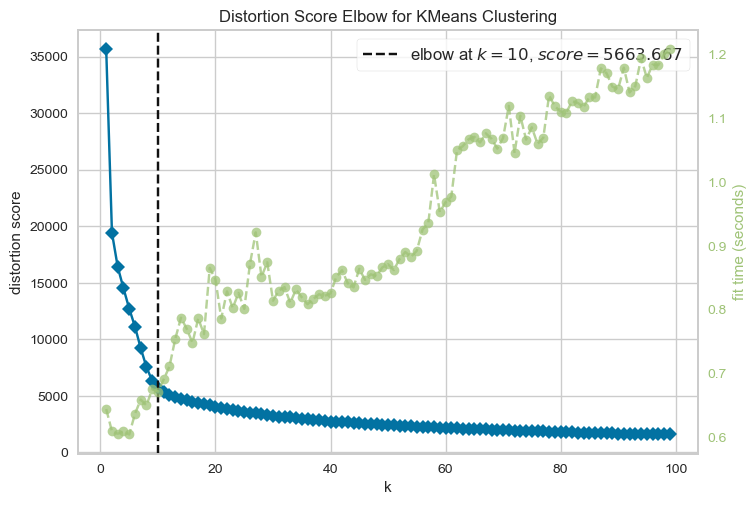

In [29]:
#Calling get_k method on our Find_K object
Find_K.get_k_distortion()

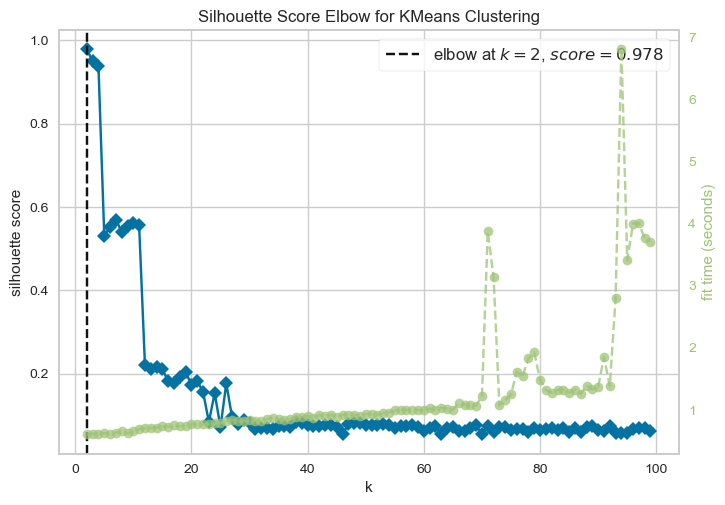

In [30]:
Find_K.get_k_silhouette()

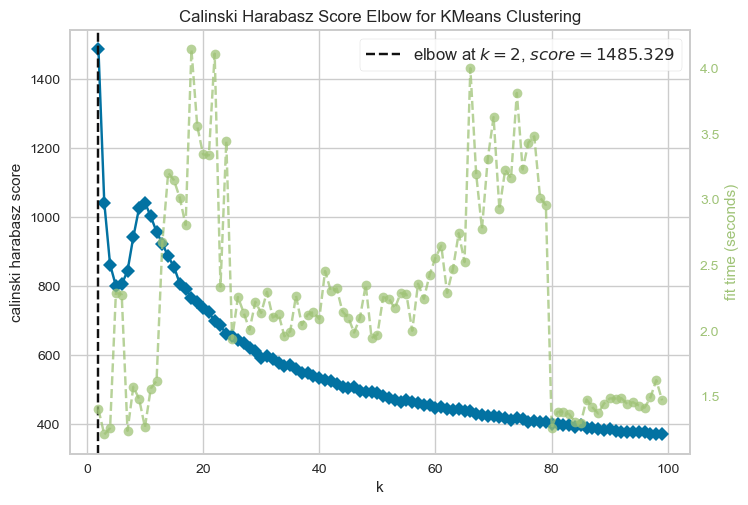

In [31]:
Find_K.get_k_calinski_harabasz()

In [32]:
model = KMeans(algorithm='auto', copy_x=True, init='k-means++', n_clusters=20, max_iter=300, n_init=10, random_state=None, tol=0.0001, verbose=0)
cluster_idx = model.fit_predict(train_data)
collections.Counter(cluster_idx)    
labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Clusters discovered: %d" % n_clusters_)

Clusters discovered: 20


### Evaluation

In [33]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import pairwise_distances

In [34]:
def davies_bouldin_index(X, labels):
    n_clusters = len(set(labels))
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
    scatter = np.array([np.mean(pairwise_distances(X[labels == i], [centroid])) for i, centroid in enumerate(centroids)])
    centroid_distances = pairwise_distances(centroids)
    dbi = 0.0
    for i in range(n_clusters):
        max_ratio = -np.inf
        for j in range(n_clusters):
            if i != j:
                # Calculate the ratio of within-cluster scatter to between-cluster distance
                ratio = (scatter[i] + scatter[j]) / centroid_distances[i][j]
                max_ratio = max(max_ratio, ratio)
        dbi += max_ratio

    dbi /= n_clusters
    return dbi

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)
 
# distances = pairwise_distances(X, clf.components_, metric='euclidean')
# max_distances = np.max(distances, axis=1)
# distortion = np.mean(max_distances ** 2)
# print("Distortion Score:", distortion)

print("Davies Bouldin Index:", davies_bouldin_index(X, labels))

Silhouette Score: -0.4026749670986244
Davies Bouldin Index: 3.660125860580422


In [35]:
clustered = model.labels_
clustered_series = pd.Series(index = X.index, data = clustered.flatten())
clustered_series_all = pd.Series(index = X.index, data = clustered.flatten())
# clustered_series = clustered_series[clustered_series != 1]

In [36]:
cluster_size_limit = 100
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts > 1) & (counts <= cluster_size_limit)]
print("Clusters formed: %d" % len(ticker_count_reduced))
print("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())

Clusters formed: 8
Pairs to evaluate: 15872


### Results

In [37]:
X_tsne = TSNE(learning_rate = 1000, perplexity = 25, random_state = 1337).fit_transform(X)

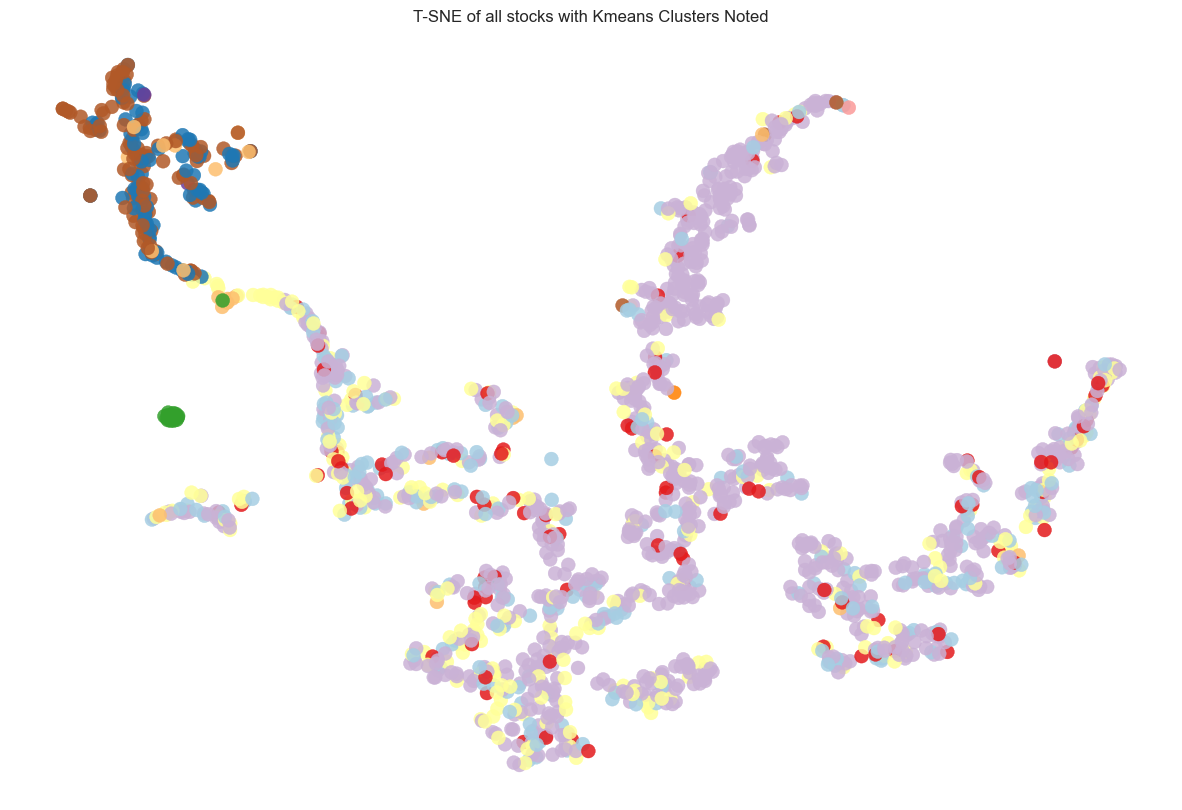

In [38]:
plt.figure(1, facecolor = 'white', figsize = (15, 10))
plt.clf()
plt.axis('off')

plt.scatter(X_tsne[(labels!=-1), 0], X_tsne[(labels!=-1), 1], s = 100, alpha = 0.85, c = labels[labels!=-1], cmap = cm.Paired)
plt.scatter(X_tsne[(clustered_series_all==-1).values, 0], X_tsne[(clustered_series_all==-1).values, 1], s = 100, alpha = 0.05)
plt.title('T-SNE of all stocks with Kmeans Clusters Noted')
plt.savefig('Pictures/T-SNE_plot_for_stock_clusters.png')
plt.show()

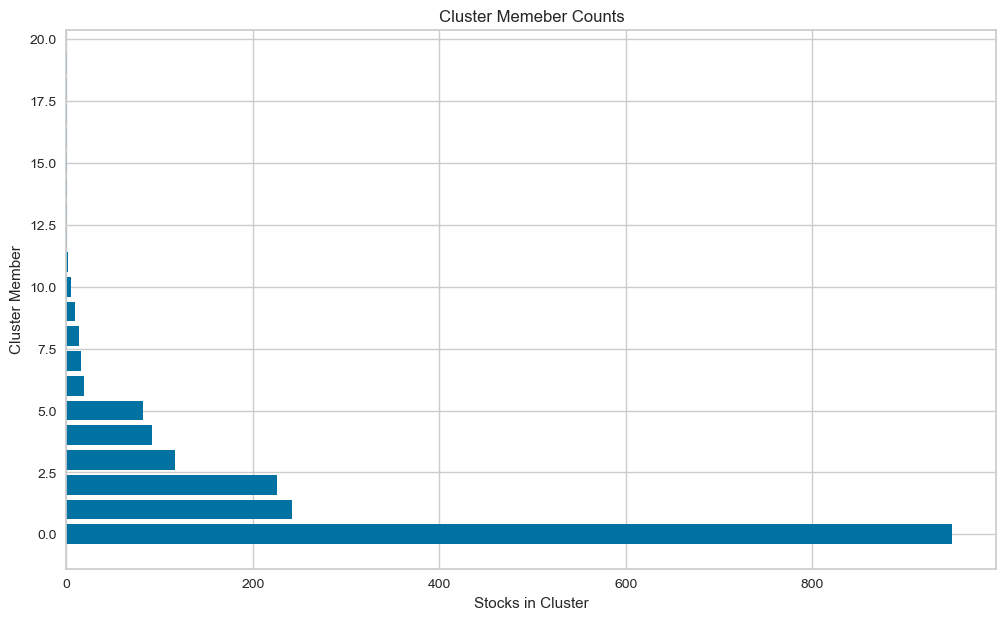

In [39]:
plt.figure(figsize = (12, 7))
plt.barh(range(len(clustered_series.value_counts())), clustered_series.value_counts())
plt.title("Cluster Memeber Counts")
plt.xlabel('Stocks in Cluster')
plt.ylabel("Cluster Member")
plt.savefig('Pictures/cluster_member_counts.png')
plt.show()

In [40]:
counts = clustered_series.value_counts()
clusters_viz_list = list(counts[(counts < 100) & (counts > 1)].index)[::-1]
print(clusters_viz_list)

[15, 19, 10, 6, 16, 11, 3, 9]


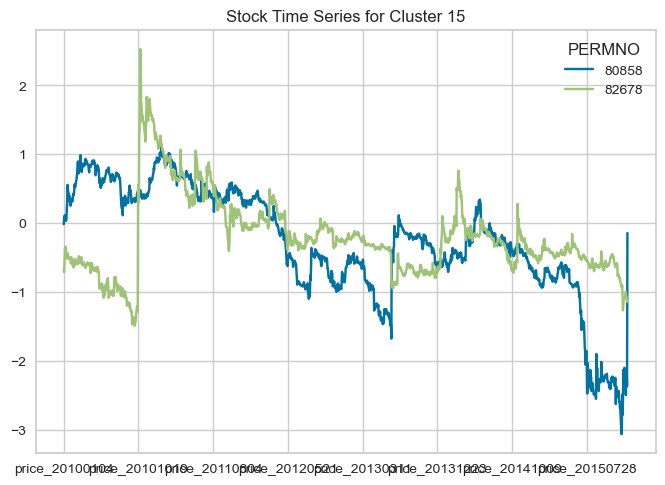

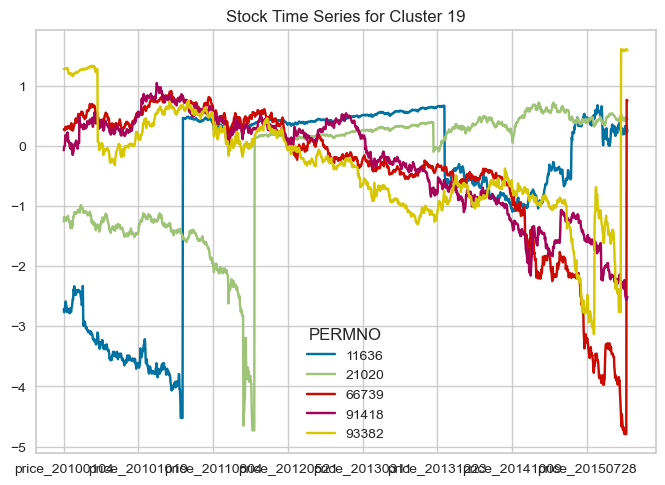

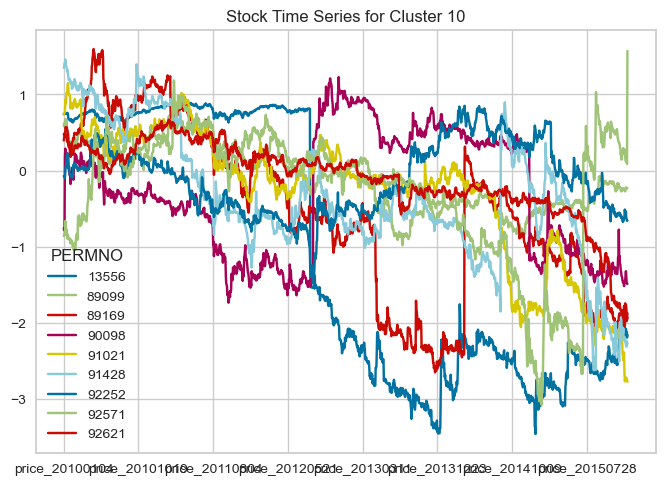

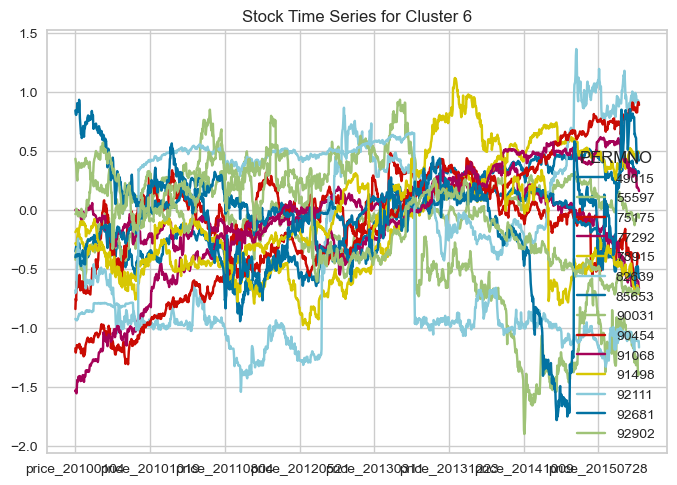

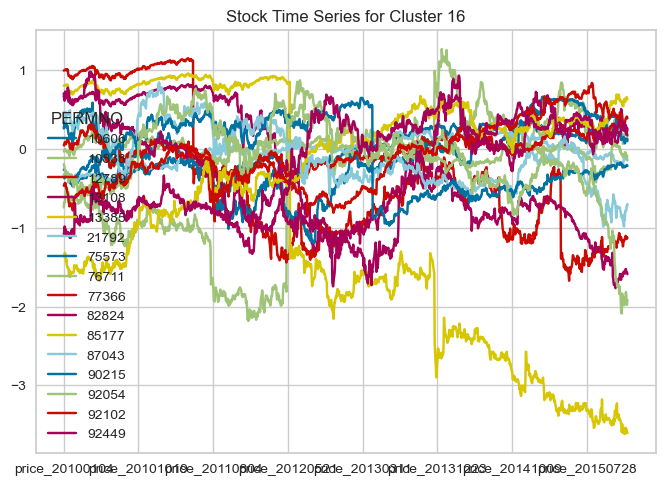

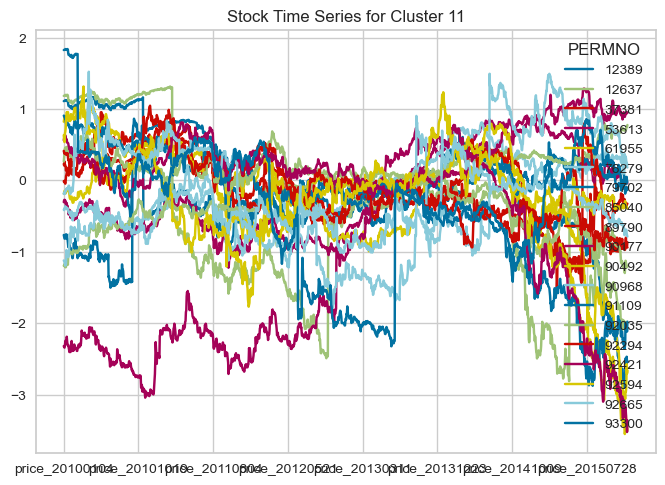

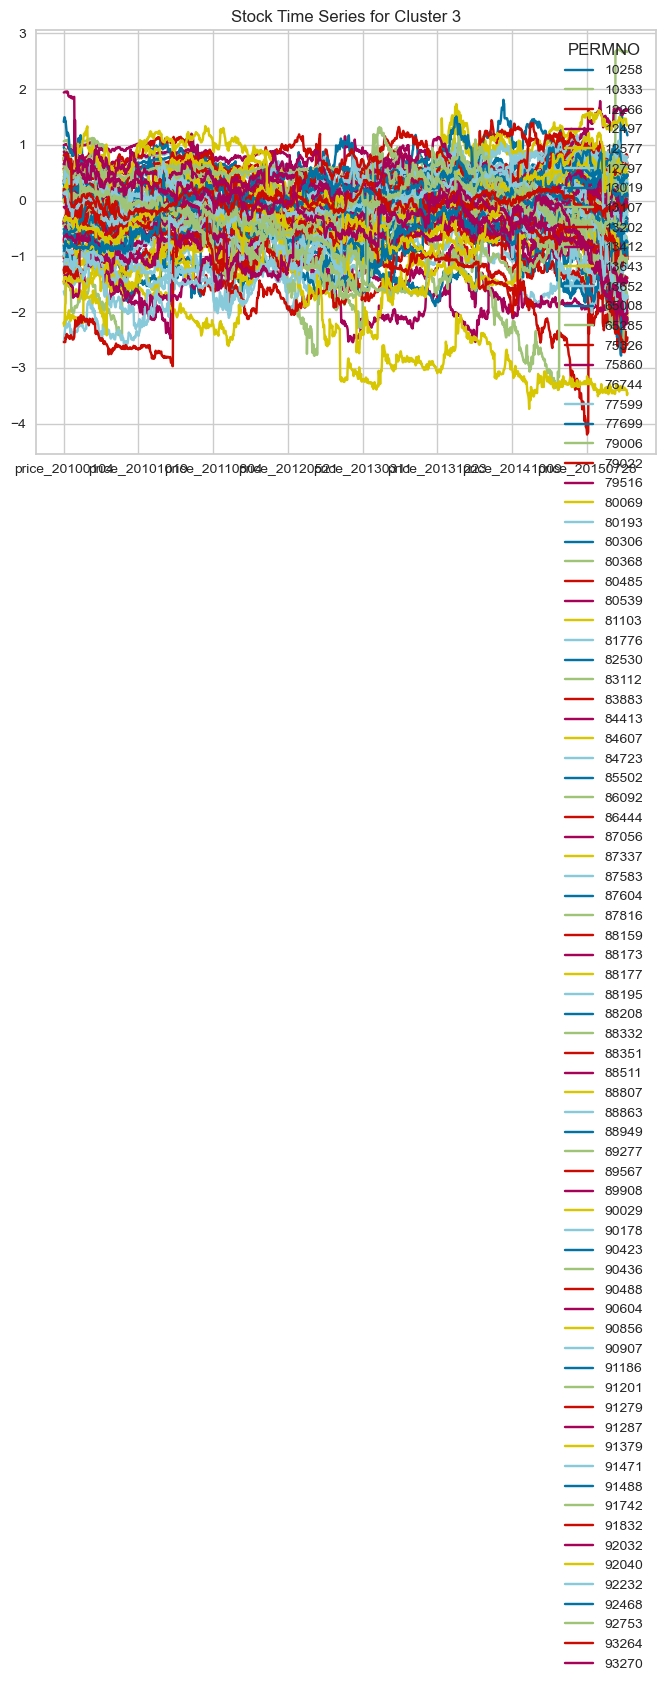

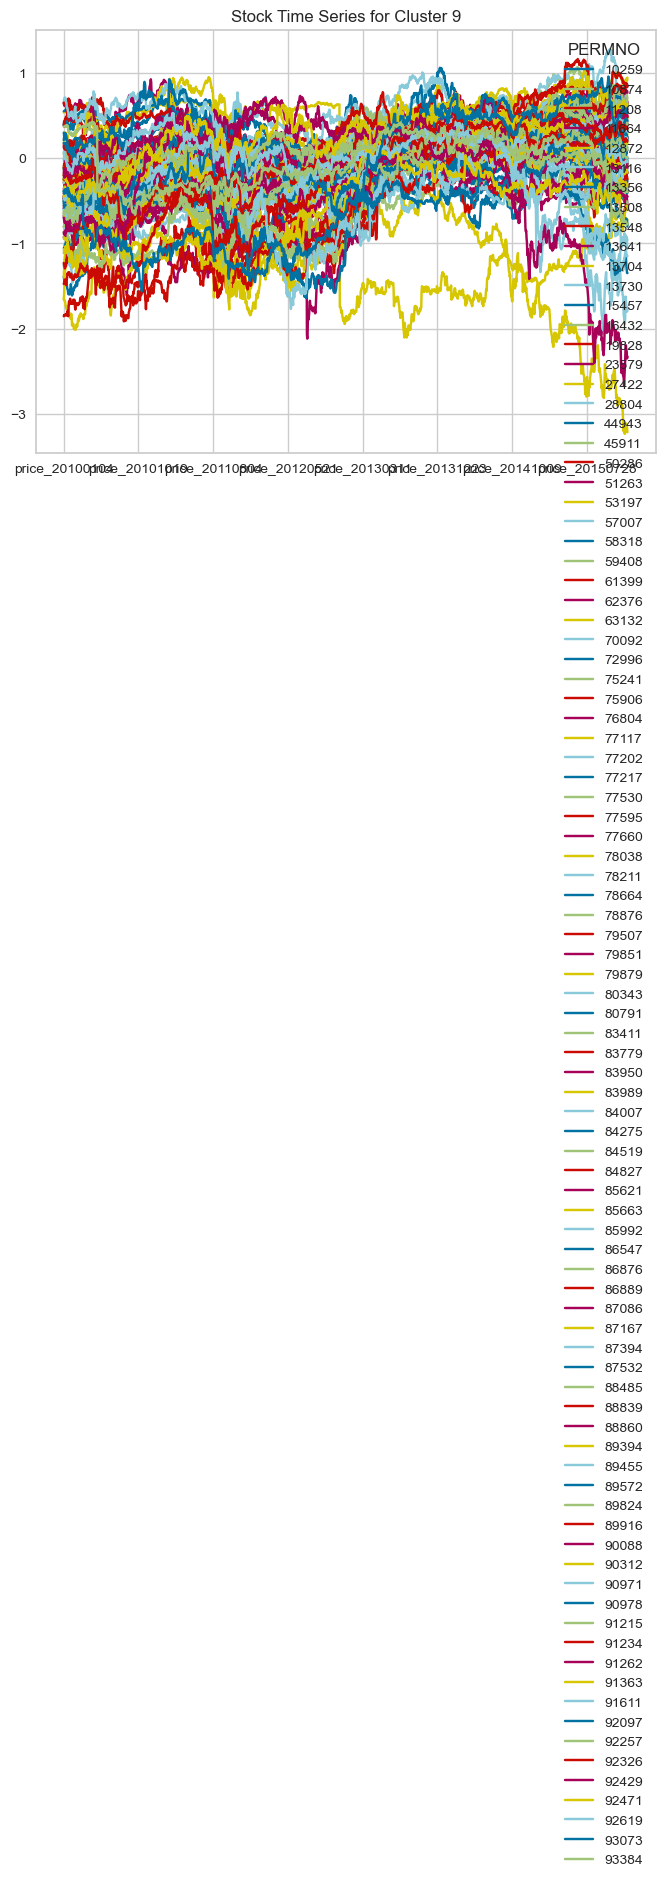

In [41]:
stock_price = price_df.set_index("PERMNO")
for c in clusters_viz_list:
    stocks = list(clustered_series[clustered_series==c].index)
    means = np.log(stock_price.loc[stocks,].T.mean())
    data = np.log(stock_price.loc[stocks,]).T.sub(means)
    data.plot(title='Stock Time Series for Cluster %d' % c)
    plt.savefig('Pictures/stock_price_clsuter_'+str(c)+'.png')
    plt.show()